In [1]:
# importing relevant libraries
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules

In [2]:
# importing the data
mba_df = pd.read_csv('../data/processed_data/cleaned_data.csv')
mba_df.head(5) 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
mba_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396337 entries, 0 to 396336
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    396337 non-null  int64  
 1   StockCode    396337 non-null  object 
 2   Description  396337 non-null  object 
 3   Quantity     396337 non-null  int64  
 4   InvoiceDate  396337 non-null  object 
 5   UnitPrice    396337 non-null  float64
 6   CustomerID   396337 non-null  float64
 7   Country      396337 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 24.2+ MB


So dataset imported is as expected !! <br>
Let us see the distinct number of products we have:

In [4]:
mba_df['Description'].nunique()

3871

That's a lot of products to analyse. So let us look at a segment, maybe the the customer who are in the "retain" segment.

In [31]:
retain_ids = pd.read_csv('../data/processed_data/retain_ids.csv',header=None).squeeze().values
len(retain_ids)

890

In [32]:
retain_customers = mba_df[mba_df['CustomerID'].isin(retain_ids)]
retain_customers.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
45,536371,22086,PAPER CHAIN KIT 50'S CHRISTMAS,80,2010-12-01 09:00:00,2.55,13748.0,United Kingdom
308,536401,22110,BIRD HOUSE HOT WATER BOTTLE,1,2010-12-01 11:21:00,2.55,15862.0,United Kingdom
309,536401,22098,BOUDOIR SQUARE TISSUE BOX,1,2010-12-01 11:21:00,1.25,15862.0,United Kingdom
310,536401,22100,SKULLS SQUARE TISSUE BOX,2,2010-12-01 11:21:00,1.25,15862.0,United Kingdom
311,536401,22766,PHOTO FRAME CORNICE,1,2010-12-01 11:21:00,2.95,15862.0,United Kingdom


In [33]:
# unique products bought by them
retain_customers['Description'].nunique()

3278

Not much of a difference but we will continue with this segment only.

In [34]:
# Group by InvoiceNo and aggregate product Description into list to create a basket
mybasket = retain_customers.groupby('InvoiceNo')['Description'].apply(list)
mybasket.head(5)

InvoiceNo
536371                    [PAPER CHAIN KIT 50'S CHRISTMAS ]
536401    [BIRD HOUSE HOT WATER BOTTLE, BOUDOIR SQUARE T...
536405                [SET/5 RED RETROSPOT LID GLASS BOWLS]
536446    [HYACINTH BULB T-LIGHT CANDLES, CHRISTMAS CRAF...
536514    [HAND WARMER OWL DESIGN, SET OF 2 WOODEN MARKE...
Name: Description, dtype: object

In [37]:
len(mybasket)

3480

- **TransactionEncoder()** will be used to convert this basket into an array, this is very similar to one-hot encoding.
- We need to do this because the "apriori" algorithm accepts the input in this form only.
- Then we will get the most frequentist itemsets as an output of the algorithm. 
- We need to set a **minimum support threshold**, which we will keep at min_support = 0.01 (1%) for now.

In [38]:
te = TransactionEncoder() # defining the encoder object
te_array = te.fit(mybasket).transform(mybasket)
basket_df = pd.DataFrame(te_array,columns = te.columns_ , index=mybasket.index)
basket_df.head(5)

,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TRELLIS COAT RACK,...,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536371,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536401,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536405,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536446,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
536514,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [36]:
# Apply Apriori algorithm to find out the most frequent itemsets
frequent_itemsets = apriori(basket_df,min_support = 0.01,use_colnames= True) # atleast 1 percent appearances

In [17]:
frequent_itemsets.shape

(905, 2)

In [18]:
frequent_itemsets_top_20 = frequent_itemsets.sort_values('support',ascending=False).head(20)
frequent_itemsets_top_20

,support,itemsets
597,0.108908,(WHITE HANGING HEART T-LIGHT HOLDER)
431,0.092529,(REGENCY CAKESTAND 3 TIER)
41,0.087931,(ASSORTED COLOUR BIRD ORNAMENT)
361,0.069540,(PARTY BUNTING)
267,0.066667,(JUMBO BAG RED RETROSPOT)
324,0.062356,(NATURAL SLATE HEART CHALKBOARD )
488,0.058046,(SET OF 3 CAKE TINS PANTRY DESIGN )
45,0.058046,(BAKING SET 9 PIECE RETROSPOT )
354,0.057471,(PAPER CHAIN KIT 50'S CHRISTMAS )
300,0.056034,(LUNCH BAG RED RETROSPOT)


- So we can see that, in the top 20 most frequently bought itemsets, we got only two itemsets which has more than one item.
- No itemsets with three or more items were in the top 20.
- So let us look at the top pairs and top triplets.

In [21]:
top_pairs = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) == 2)].sort_values('support',ascending=False)
top_pairs

,support,itemsets
690,0.025862,"(GARDENERS KNEELING PAD CUP OF TEA , GARDENERS..."
648,0.025287,"(ALARM CLOCK BAKELIKE GREEN, ALARM CLOCK BAKEL..."
696,0.025000,"(ROSES REGENCY TEACUP AND SAUCER , GREEN REGEN..."
824,0.024713,"(PAPER CHAIN KIT VINTAGE CHRISTMAS, PAPER CHAI..."
711,0.022989,"(HEART OF WICKER LARGE, HEART OF WICKER SMALL)"
...,...,...
642,0.010057,"(PACK OF 60 SPACEBOY CAKE CASES, 72 SWEETHEART..."
749,0.010057,"(JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO BAG ..."
743,0.010057,"(JUMBO BAG APPLES, JUMBO BAG PINK POLKADOT)"
632,0.010057,"(60 CAKE CASES DOLLY GIRL DESIGN, PACK OF 60 P..."


In [23]:
top_pairs.loc[690]['itemsets']

frozenset({'GARDENERS KNEELING PAD CUP OF TEA ',
           'GARDENERS KNEELING PAD KEEP CALM '})

In [24]:
top_triplets = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) == 3)].sort_values('support',ascending=False)
top_triplets

,support,itemsets
888,0.019540,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY..."
889,0.016092,"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC..."
887,0.014943,"(GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY..."
902,0.014080,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY..."
895,0.013506,"(LUNCH BAG PINK POLKADOT, LUNCH BAG CARS BLUE,..."
886,0.013218,"(ALARM CLOCK BAKELIKE PINK, ALARM CLOCK BAKELI..."
896,0.011494,"(LUNCH BAG PINK POLKADOT, LUNCH BAG SPACEBOY D..."
897,0.011494,"(LUNCH BAG PINK POLKADOT, LUNCH BAG SUKI DESIG..."
890,0.011207,"(LUNCH BAG BLACK SKULL., LUNCH BAG PINK POLKA..."
899,0.011207,"(LUNCH BAG CARS BLUE, LUNCH BAG SUKI DESIGN , ..."


In [25]:
# top 20 pairs
top_20_pairs = top_pairs.head(20).copy()

# creating a modified dataframe
top_20_pairs['Item1'] = top_20_pairs['itemsets'].apply(lambda x: list(x)[0])
top_20_pairs['Item2'] = top_20_pairs['itemsets'].apply(lambda x: list(x)[1])
top_20_pairs

,support,itemsets,Item1,Item2
690,0.025862,"(GARDENERS KNEELING PAD CUP OF TEA , GARDENERS...",GARDENERS KNEELING PAD CUP OF TEA,GARDENERS KNEELING PAD KEEP CALM
648,0.025287,"(ALARM CLOCK BAKELIKE GREEN, ALARM CLOCK BAKEL...",ALARM CLOCK BAKELIKE GREEN,ALARM CLOCK BAKELIKE RED
696,0.025000,"(ROSES REGENCY TEACUP AND SAUCER , GREEN REGEN...",ROSES REGENCY TEACUP AND SAUCER,GREEN REGENCY TEACUP AND SAUCER
824,0.024713,"(PAPER CHAIN KIT VINTAGE CHRISTMAS, PAPER CHAI...",PAPER CHAIN KIT VINTAGE CHRISTMAS,PAPER CHAIN KIT 50'S CHRISTMAS
711,0.022989,"(HEART OF WICKER LARGE, HEART OF WICKER SMALL)",HEART OF WICKER LARGE,HEART OF WICKER SMALL
795,0.022989,"(LUNCH BAG PINK POLKADOT, LUNCH BAG CARS BLUE)",LUNCH BAG PINK POLKADOT,LUNCH BAG CARS BLUE
776,0.022989,"(LUNCH BAG BLACK SKULL., LUNCH BAG RED RETROS...",LUNCH BAG BLACK SKULL.,LUNCH BAG RED RETROSPOT
694,0.022701,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",PINK REGENCY TEACUP AND SAUCER,GREEN REGENCY TEACUP AND SAUCER
759,0.022414,"(JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO BAG ...",JUMBO SHOPPER VINTAGE RED PAISLEY,JUMBO BAG RED RETROSPOT
883,0.022126,"(WOODEN PICTURE FRAME WHITE FINISH, WOODEN FRA...",WOODEN PICTURE FRAME WHITE FINISH,WOODEN FRAME ANTIQUE WHITE


In [26]:
heatmap_pair_data = pd.crosstab(
    top_20_pairs['Item1'],
    top_20_pairs['Item2'],
    values = top_20_pairs['support'],
    aggfunc='mean',dropna = True)

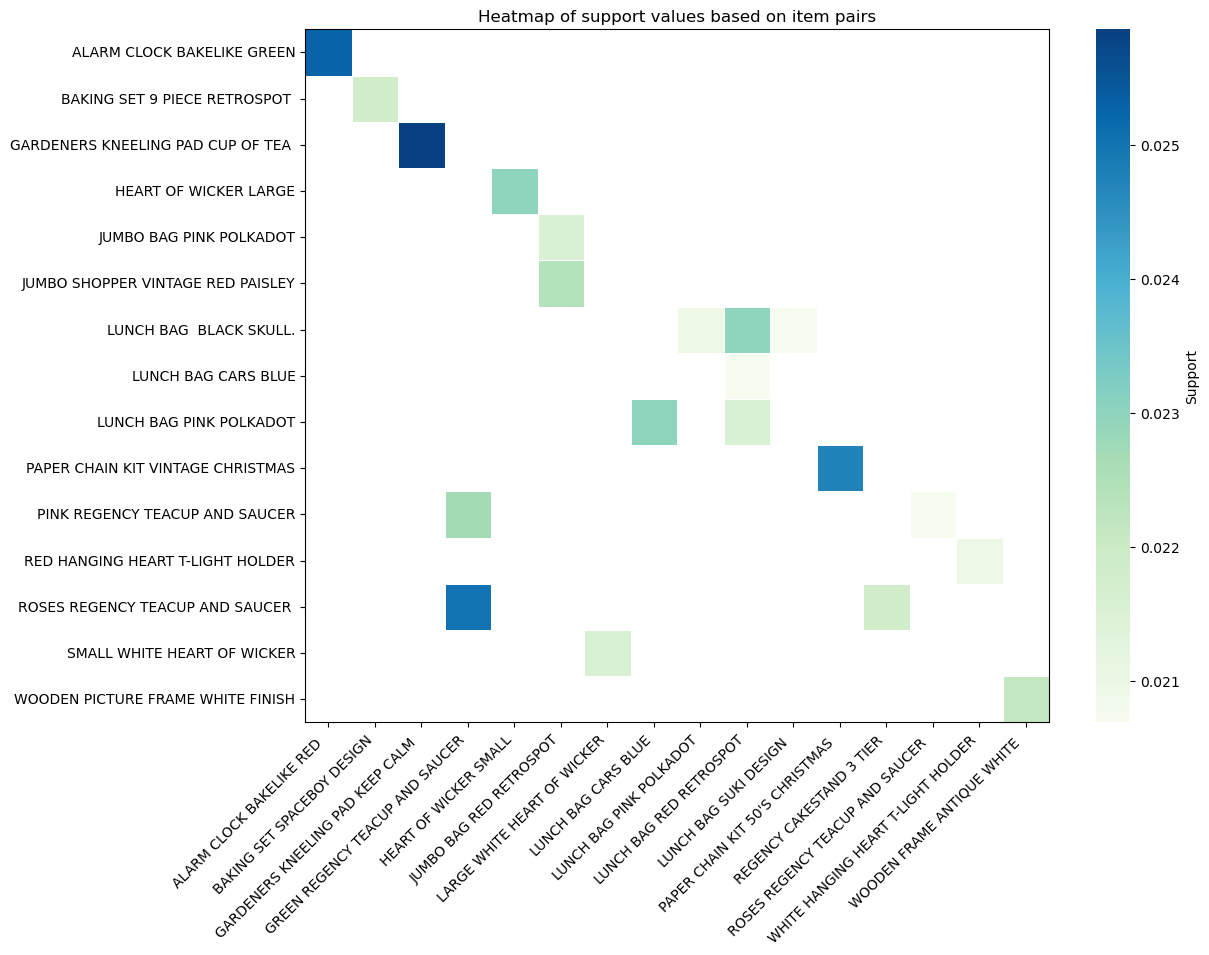

In [27]:
# plotting the heatmap
plt.figure(figsize=(12,9))
sns.heatmap(heatmap_pair_data,cmap = 'GnBu',annot = False,fmt = '.1f',cbar_kws = {'label':'Support'},linewidths = 0.5)
plt.title('Heatmap of support values based on item pairs')
plt.xticks(rotation = 45,ha = 'right')
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.xlabel('')
plt.ylabel('')
plt.show()

In [28]:
# Get top 10 2-item frequent itemsets sorted by support in a horizontal bar plot
top_10_pairs = top_pairs.head(10).copy()

In [29]:
top_10_pairs 

,support,itemsets
690,0.025862,"(GARDENERS KNEELING PAD CUP OF TEA , GARDENERS..."
648,0.025287,"(ALARM CLOCK BAKELIKE GREEN, ALARM CLOCK BAKEL..."
696,0.025000,"(ROSES REGENCY TEACUP AND SAUCER , GREEN REGEN..."
824,0.024713,"(PAPER CHAIN KIT VINTAGE CHRISTMAS, PAPER CHAI..."
711,0.022989,"(HEART OF WICKER LARGE, HEART OF WICKER SMALL)"
795,0.022989,"(LUNCH BAG PINK POLKADOT, LUNCH BAG CARS BLUE)"
776,0.022989,"(LUNCH BAG BLACK SKULL., LUNCH BAG RED RETROS..."
694,0.022701,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY..."
759,0.022414,"(JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO BAG ..."
883,0.022126,"(WOODEN PICTURE FRAME WHITE FINISH, WOODEN FRA..."


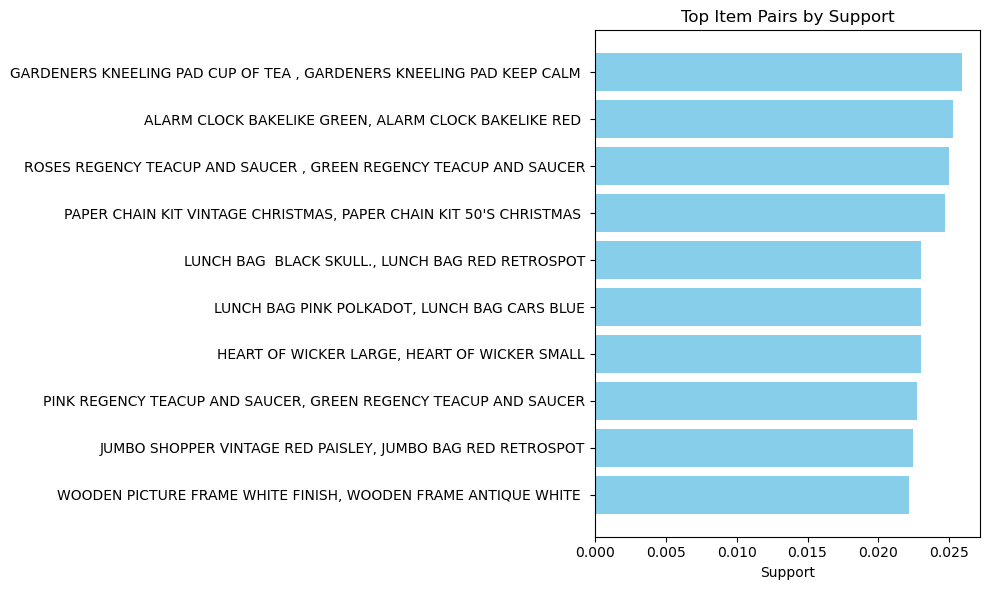

In [30]:
import matplotlib.pyplot as plt

# Create a copy of your DataFrame (assuming it's named 'top_pairs')
bar_data = top_10_pairs[['itemsets', 'support']].copy()

# Convert frozensets/itemsets to readable strings
bar_data['itemsets'] = bar_data['itemsets'].apply(lambda x: ', '.join(list(x)))

# Sort by support descending
bar_data = bar_data.sort_values(by='support', ascending=True)  # ascending=True for horizontal bars top-down

# Plot
plt.figure(figsize=(10, 6))
plt.barh(bar_data['itemsets'], bar_data['support'], color='skyblue')
plt.xlabel('Support')
plt.title('Top Item Pairs by Support')
plt.tight_layout()
plt.show()


In [39]:
def generate_association_rules(frequent_itemsets, min_confidence=0.5):
    rules = []
    
    for itemset, support in frequent_itemsets.items():
        if len(itemset) < 2:
            continue
            
        # Generate all possible antecedent-consequent combinations
        for i in range(1, len(itemset)):
            # Get all combinations of size i as antecedents
            from itertools import combinations
            for antecedent in combinations(itemset, i):
                antecedent = frozenset(antecedent)
                consequent = itemset - antecedent
                
                # Calculate confidence
                antecedent_support = frequent_itemsets.get(antecedent, 0)
                if antecedent_support > 0:
                    confidence = support / antecedent_support
                    
                    if confidence >= min_confidence:
                        rules.append({
                            'antecedent': antecedent,
                            'consequent': consequent,
                            'support': support,
                            'confidence': confidence,
                            'lift': support / (antecedent_support * frequent_itemsets.get(consequent, 0))
                        })
    
    return rules

In [40]:
generate_association_rules(frequent_itemsets)

TypeError: unsupported operand type(s) for -: 'str' and 'frozenset'

In [42]:
# Generate rules directly from your frequent_itemsets DataFrame
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
print(rules.head())

                         antecedents                        consequents  \
0   (PACK OF 60 SPACEBOY CAKE CASES)  (60 CAKE CASES DOLLY GIRL DESIGN)   
1  (60 CAKE CASES DOLLY GIRL DESIGN)   (PACK OF 60 SPACEBOY CAKE CASES)   
2  (60 CAKE CASES DOLLY GIRL DESIGN)  (PACK OF 72 RETROSPOT CAKE CASES)   
3      (60 TEATIME FAIRY CAKE CASES)  (PACK OF 72 RETROSPOT CAKE CASES)   
4   (ALARM CLOCK BAKELIKE CHOCOLATE)       (ALARM CLOCK BAKELIKE GREEN)   

   antecedent support  consequent support   support  confidence       lift  \
0            0.025287            0.023276  0.013218    0.522727  22.457912   
1            0.023276            0.025287  0.013218    0.567901  22.457912   
2            0.023276            0.054310  0.012356    0.530864   9.774642   
3            0.034195            0.054310  0.017816    0.521008   9.593171   
4            0.015230            0.033333  0.011782    0.773585  23.207547   

   representativity  leverage  conviction  zhangs_metric   jaccard  certainty  \

In [46]:
rules_df = rules[['antecedents','consequents','antecedent support','consequent support','support','confidence','lift']]

In [47]:
rules_df['confidence'].sort_values(ascending=False)

143    0.944444
195    0.938776
127    0.930233
33     0.930233
134    0.897436
         ...   
155    0.500000
25     0.500000
20     0.500000
173    0.500000
170    0.500000
Name: confidence, Length: 203, dtype: float64